<a href="https://colab.research.google.com/github/maverick98/CDS/blob/main/1_Group38__PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. CHARU MATHUR : 2023AA05055
2. SREERAMA GUNAVARDHAN : 2023AA05060
3. SATYAJIT CHATTERJEE : 2023AA05625
4. MANO RANJAN SAHU : 2023AA05738



##1. Install Required Libraries

In [ ]:
#  Install Rapids library
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


##2. Generate Dataset

In [2]:
from sklearn.datasets import make_blobs
import numpy as np

# Create a dataset with 500,000 samples, 5 features, and 3 centers (Gaussian distributions)
n_samples = 500000
n_features = 5
n_clusters = 3

X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

##3. K-Means Clustering with cuML

In [3]:
from cuml.cluster import KMeans as cuKMeans

# Initialize and fit the cuML KMeans model
kmeans_cuml = cuKMeans(n_clusters=n_clusters, random_state=42)
kmeans_cuml.fit(X)

# Get cluster labels and cluster centers
labels = kmeans_cuml.labels_
centers = kmeans_cuml.cluster_centers_

##4. Visualize Clusters

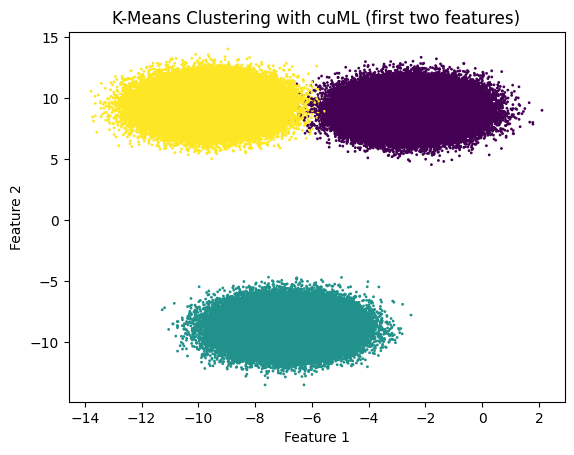

In [4]:
import matplotlib.pyplot as plt

# Plot the first two features
plt.scatter(X[:, 0], X[:, 1], c=labels, s=1, cmap='viridis')
plt.title('K-Means Clustering with cuML (first two features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


##5. Calculate Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")